# Capítulo 5 - Sequências Input/Output

Neste capítulo, discuriremos mais sobre o módulo `Bio.SeqIO`, cjo teve uma breve introdução no Capítulo 2 (https://github.com/GTL98/biopython_br/tree/main/Cap%202%20-%20O%20que%20podemos%20fazer%20com%20o%20Biopython) e usamos algumas de suas funções no Capítulo 4 (https://github.com/GTL98/biopython_br/tree/main/Cap%204%20-%20Objetos%20de%20anota%C3%A7%C3%A3o%20de%20sequ%C3%AAncia). Esse módulo fornece uma interface simples para trabalhar com variados formatos de arquivos de sequência em um caminho uniforme. Para saber mais, acesse o link https://biopython.org/wiki/SeqIO e a documentação online https://biopython.org/docs/1.79/api/Bio.SeqIO.html:

In [1]:
from Bio import SeqIO
help(SeqIO)

Help on package Bio.SeqIO in Bio:

NAME
    Bio.SeqIO - Sequence input/output as SeqRecord objects.

DESCRIPTION
    Bio.SeqIO is also documented at SeqIO_ and by a whole chapter in our tutorial:
    
      - `HTML Tutorial`_
      - `PDF Tutorial`_
    
    .. _SeqIO: http://biopython.org/wiki/SeqIO
    .. _`HTML Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.html
    .. _`PDF Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.pdf
    
    Input
    -----
    The main function is Bio.SeqIO.parse(...) which takes an input file handle
    (or in recent versions of Biopython alternatively a filename as a string),
    and format string.  This returns an iterator giving SeqRecord objects:
    
    >>> from Bio import SeqIO
    >>> for record in SeqIO.parse("Fasta/f002", "fasta"):
    ...     print("%s %i" % (record.id, len(record)))
    gi|1348912|gb|G26680|G26680 633
    gi|1348917|gb|G26685|G26685 413
    gi|1592936|gb|G29385|G29385 471
    
    Note that the parse(

O "problma" é que você tem que trabalhar com objetos **SeqRecords** (visto no Capítulo 4: https://github.com/GTL98/biopython_br/tree/main/Cap%204%20-%20Objetos%20de%20anota%C3%A7%C3%A3o%20de%20sequ%C3%AAncia) que contêm o objeto **Seq** (visto no Capítulo 3: https://github.com/GTL98/biopython_br/tree/main/Cap%203%20-%20Objetos%20de%20Sequ%C3%AAncia) mais as anotações como a identificação e descrição. Observe quando estamos trabalhando com grandes arquivos FASTA ou FASTQ, a sobrecarga que trabalhar com todos esses objetos deixará o script lento. Nesse caso, considere usar os analisadores **SimpleFastaParser** e **FastqGeneralIterator** que retornarão uma tupla de strings para cada registro (ver a **Seção 5.6**).

## 5.1 Analisar ou ler as sequências

A função **parse** do módulo `Bio.SeqIO` é usada para ler uma sequência em objetos **SeqRecord**. Essa função necessita de dois argumentos:
1. O primeiro argumento é um *identificador* para ler os dados ou um nome de arquivo. Um identificador típico abre o arquivo para leitura, mas pode ser a saída de um programa de linha de comando, ou um conjunto de dados baixados da internet (ver a **Seção 5.3**). Veja a **Seção 24.1** para mais informações sobre os identificadores (Capítulo 24: ***link do capítulo 24***).

2. O segundo argumento é uma string de caractéres minúsculos para especificar o formato de arquivo. Para saber todos os formatos suportados, acesse: https://biopython.org/wiki/SeqIO.

A função **parse** retorna um *iterador* que contém objetos **SeqRecord**. Iteradores são usados nos loops (mostrados ao decorrer deste capítulo).

Muitas vezes você encontrará arquivos com um único registro. Para esta situação, use a função **read** do módulo `Bio.SeqIO` que possui os mesmos argumentos. Use essa função desde que haja somente um registro no arquivo, caso contrário, será retornado um erro.

### 5.1.1 Lendo os arquivos de sequência

De modo geral, a função **parse** é usada para ler os objetos **SeqRecord** em um loop como o seguinte:

In [2]:
from Bio import SeqIO
for registro_seq in SeqIO.parse('ls_orchid.fasta', 'fasta'):
    print(registro_seq.id)
    print(repr(registro_seq.seq))
    print(len(registro_seq))

gi|2765658|emb|Z78533.1|CIZ78533
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
740
gi|2765657|emb|Z78532.1|CCZ78532
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC')
753
gi|2765656|emb|Z78531.1|CFZ78531
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA')
748
gi|2765655|emb|Z78530.1|CMZ78530
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT')
744
gi|2765654|emb|Z78529.1|CLZ78529
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA')
733
gi|2765652|emb|Z78527.1|CYZ78527
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC')
718
gi|2765651|emb|Z78526.1|CGZ78526
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT')
730
gi|2765650|emb|Z78525.1|CAZ78525
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA')
704
gi|2765649|emb|Z78524.1|CFZ78524
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC')
740
gi|2765648|emb|Z78523.1|CHZ78523
Seq('CGTAACCAGGTTTCCGT

O exemplo acima é o mesmo apresentado na **Seção 2.4** do Capítulo 2 (https://github.com/GTL98/biopython_br/tree/main/Cap%202%20-%20O%20que%20podemos%20fazer%20com%20o%20Biopython), onde carregamos as sequências de DNA no formato FASTA. Se você quiser carregar um arquivo no formato GenBank, basta mudar a extensão do arquivo e o segundo parâmetro:

In [3]:
from Bio import SeqIO
for registro_seq in SeqIO.parse('ls_orchid.gbk', 'genbank'):
    print(registro_seq.id)
    print(repr(registro_seq.seq))
    print(len(registro_seq))

Z78533.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
740
Z78532.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC')
753
Z78531.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA')
748
Z78530.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT')
744
Z78529.1
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA')
733
Z78527.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC')
718
Z78526.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT')
730
Z78525.1
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA')
704
Z78524.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC')
740
Z78523.1
Seq('CGTAACCAGGTTTCCGTAGGTGAACCTGCGGCAGGATCATTGTTGAGACAGCAG...AAG')
709
Z78522.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...GAG')
700
Z78521.1
Seq('GTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAGAATATATGATCGAGT...ACC')
726
Z78520.1
Seq('CGTAACAAGGTTTC

De modo silimar, se você quiser ler um outro formato de arquivo, assumindo que seja suportado pela função, basta mudar o segundo argumento, por exemplo: 'swiss' para arquivos SwissProt ou 'embl' para arquivos de texto EMBL. Na wiki do Biopython (https://biopython.org/wiki/SeqIO) há uma lista completa com os formatos de arquivos suportados, bem como a documentação *built in* (https://biopython.org/docs/1.79/api/Bio.SeqIO.html).

Outra maneira de usar os iteradores em Python é com *list comprehension*. Por exemplo, se você quiser extrair uma lista de identificadores de um arquivo, você pode facilmente fazer isso com *list comprehension*:

In [4]:
from Bio import SeqIO
identificadores = [registro_seq.id for registro_seq in SeqIO.parse('ls_orchid.gbk', 'genbank')]
identificadores

['Z78533.1',
 'Z78532.1',
 'Z78531.1',
 'Z78530.1',
 'Z78529.1',
 'Z78527.1',
 'Z78526.1',
 'Z78525.1',
 'Z78524.1',
 'Z78523.1',
 'Z78522.1',
 'Z78521.1',
 'Z78520.1',
 'Z78519.1',
 'Z78518.1',
 'Z78517.1',
 'Z78516.1',
 'Z78515.1',
 'Z78514.1',
 'Z78513.1',
 'Z78512.1',
 'Z78511.1',
 'Z78510.1',
 'Z78509.1',
 'Z78508.1',
 'Z78507.1',
 'Z78506.1',
 'Z78505.1',
 'Z78504.1',
 'Z78503.1',
 'Z78502.1',
 'Z78501.1',
 'Z78500.1',
 'Z78499.1',
 'Z78498.1',
 'Z78497.1',
 'Z78496.1',
 'Z78495.1',
 'Z78494.1',
 'Z78493.1',
 'Z78492.1',
 'Z78491.1',
 'Z78490.1',
 'Z78489.1',
 'Z78488.1',
 'Z78487.1',
 'Z78486.1',
 'Z78485.1',
 'Z78484.1',
 'Z78483.1',
 'Z78482.1',
 'Z78481.1',
 'Z78480.1',
 'Z78479.1',
 'Z78478.1',
 'Z78477.1',
 'Z78476.1',
 'Z78475.1',
 'Z78474.1',
 'Z78473.1',
 'Z78472.1',
 'Z78471.1',
 'Z78470.1',
 'Z78469.1',
 'Z78468.1',
 'Z78467.1',
 'Z78466.1',
 'Z78465.1',
 'Z78464.1',
 'Z78463.1',
 'Z78462.1',
 'Z78461.1',
 'Z78460.1',
 'Z78459.1',
 'Z78458.1',
 'Z78457.1',
 'Z78456.1',

Há mais exemplos usando a função **parse** com *list comprehension* na **Seção 20.2**, como pltar o tamanho das sequências ou o conteúdo GC. (Capítulo 20: ***link do capítulo 20***).

### 5.1.2 Iterando sobre os registros em um arquivo de sequência

Nos exemplos acima, nós usamos um loop para iterar sobre os registros um por um. Você pode usar o loop com todos os objetos Python (incluindo listas, tuplas e strings) que suporte iteração.

O objeto retornado pelo `Bio.SeqIO` é atualmente um interador que retorna objetos **SeqRecord**. Você consegue ver cada registro, mas somente uma vez. O ponto positivo disso é qe você salva grandes quantidades de memória quando trabalha com arquivos grandes.

Ao invés de usar um loop, você pode usar a função **next** em um iterador para percorrer as entradas desse modo:

In [5]:
from Bio import SeqIO
iterador_registro = SeqIO.parse('ls_orchid.fasta', 'fasta')

primeiro_registro = next(iterador_registro)
print(primeiro_registro.id)
print(primeiro_registro.description)

segundo_registro = next(iterador_registro)
print(segundo_registro.id)
print(segundo_registro.description)

gi|2765658|emb|Z78533.1|CIZ78533
gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
gi|2765657|emb|Z78532.1|CCZ78532
gi|2765657|emb|Z78532.1|CCZ78532 C.californicum 5.8S rRNA gene and ITS1 and ITS2 DNA


Note que se você usar a função **next** e não obtiver mais resultados, uma exceção é retornada (**StopIteration**).

Mais um caso especial a considerar é quando o seu arquivo possui vários registros, mas você quer somente o primeiro. Nessa situação, o código é bem conciso:

In [6]:
from Bio import SeqIO
primeiro_registro = next(SeqIO.parse('ls_orchid.gbk', 'genbank'))
primeiro_registro

SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC'), id='Z78533.1', name='Z78533', description='C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA', dbxrefs=[])

Um pequeno aviso. Usar a função **next** como mostrado, ignorará reistros adicionais do arquivo. Se o seu arquivo possuir somente um registro, como arquivos GenBank com um único cromossomo, é aconselhável que seja usada a função **read**. Isso verificará se não há registros extras inesperados presentes.

### 5.1.3 Obtendo uma lista de registros em um arquivo de sequência

Na seção anterior, nós falamos sobre o fato da função **parse** retornar um iterador **SeqRecord** que mostra os registros um a um. Muitas vezes, você precisa ser capaz de acessar os registros em qualquer ordem. Uma lista Python é perfeita para isso. Pode os transformar um registro iterado em ma lista de objetos **SeqRecord** usando a função **list** nativa do Python:

In [7]:
from Bio import SeqIO
registros = list(SeqIO.parse('ls_orchid.gbk', 'genbank'))

print(f'Encontrado {len(registros)} registros')

print('Último registro:')
ultimo_registro = registros[-1]  # usamos alguns truques de lista
print(repr(ultimo_registro.seq))
print(len(ultimo_registro))

print('Primeiro registro:')
primeiro_registro = registros[0]  # lembre-se que o Python começa a contar do zero
print(repr(primeiro_registro.seq))
print(len(primeiro_registro))

Encontrado 94 registros
Último registro:
Seq('CATTGTTGAGATCACATAATAATTGATCGAGTTAATCTGGAGGATCTGTTTACT...GCC')
592
Primeiro registro:
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
740


É óbvio que você pode continuar usando um loop para os objetos **SeqRecord**, mas usar uma lista é mais flexível do que um iterador (por exemplo, você pode determinar o número de registros o comprimento da lista), mas você precisa de mais memória pois manterá todos os registros na memória de uma só vez.

### 5.1.4 Extraindo dados

O objeto **SeqRecord** e suas estruturas de anotação foram descritas em detalhes no Capítulo 4 (https://github.com/GTL98/biopython_br/tree/main/Cap%204%20-%20Objetos%20de%20anota%C3%A7%C3%A3o%20de%20sequ%C3%AAncia). Como um exemplo de como as anotações são armazenadas, camos olhar a saída da análise do primeiro registor de um arquivo GenBank:

In [8]:
from Bio import SeqIO
iterador_registro = SeqIO.parse('ls_orchid.gbk', 'genbank')
primeiro_registro = next(iterador_registro)
print(primeiro_registro)

ID: Z78533.1
Name: Z78533
Description: C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
Number of features: 5
/molecule_type=DNA
/topology=linear
/data_file_division=PLN
/date=30-NOV-2006
/accessions=['Z78533']
/sequence_version=1
/gi=2765658
/keywords=['5.8S ribosomal RNA', '5.8S rRNA gene', 'internal transcribed spacer', 'ITS1', 'ITS2']
/source=Cypripedium irapeanum
/organism=Cypripedium irapeanum
/taxonomy=['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Asparagales', 'Orchidaceae', 'Cypripedioideae', 'Cypripedium']
/references=[Reference(title='Phylogenetics of the slipper orchids (Cypripedioideae: Orchidaceae): nuclear rDNA ITS sequences', ...), Reference(title='Direct Submission', ...)]
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')


O código acima retorna um sumário capaz de um humano ler e compreender o seu conteúdo. Como exemplo, vamos chamar o atributo **annotations**, que é um dicionário Python. As informações do dicionário das anotações são as mesmas que as mostradas acima. Você pode mostrá-las diretamente:

In [9]:
print(primeiro_registro.annotations)

{'molecule_type': 'DNA', 'topology': 'linear', 'data_file_division': 'PLN', 'date': '30-NOV-2006', 'accessions': ['Z78533'], 'sequence_version': 1, 'gi': '2765658', 'keywords': ['5.8S ribosomal RNA', '5.8S rRNA gene', 'internal transcribed spacer', 'ITS1', 'ITS2'], 'source': 'Cypripedium irapeanum', 'organism': 'Cypripedium irapeanum', 'taxonomy': ['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Asparagales', 'Orchidaceae', 'Cypripedioideae', 'Cypripedium'], 'references': [Reference(title='Phylogenetics of the slipper orchids (Cypripedioideae: Orchidaceae): nuclear rDNA ITS sequences', ...), Reference(title='Direct Submission', ...)]}


Como qualquer dicionário Python, você pode selecionar somente as chaves:

In [10]:
print(primeiro_registro.annotations.keys())

dict_keys(['molecule_type', 'topology', 'data_file_division', 'date', 'accessions', 'sequence_version', 'gi', 'keywords', 'source', 'organism', 'taxonomy', 'references'])


Ou os valores:

In [11]:
print(primeiro_registro.annotations.values())

dict_values(['DNA', 'linear', 'PLN', '30-NOV-2006', ['Z78533'], 1, '2765658', ['5.8S ribosomal RNA', '5.8S rRNA gene', 'internal transcribed spacer', 'ITS1', 'ITS2'], 'Cypripedium irapeanum', 'Cypripedium irapeanum', ['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Asparagales', 'Orchidaceae', 'Cypripedioideae', 'Cypripedium'], [Reference(title='Phylogenetics of the slipper orchids (Cypripedioideae: Orchidaceae): nuclear rDNA ITS sequences', ...), Reference(title='Direct Submission', ...)]])


De modo geral, os valores de **annotations** são strings ou uma lista de strings. Um caso especial ocorre quando uma referência no arquivo é armazenada em algum objeto de referência.

Suponha que você queira extrair uma lista das espécies presentes no arquivo *ls_orchid.gbk*. A informação que você deseja, *Cypripedium irapeanum*, está armazenada nas chaves **source** e **organism** do dicionário **annotations**:

In [12]:
print(primeiro_registro.annotations['source'])

Cypripedium irapeanum


Ou:

In [13]:
print(primeiro_registro.annotations['organism'])

Cypripedium irapeanum


Geralmente, a chave **organism** é usado para o nome científico (em Latim, e.g. *Aedes aegypti*) enquanto a chave **source** é usado para o nome comum (e.g. Mosquito-da-dengue). Nesse exemplo acima, ambas as chaves possuem o mesmo valor.

Agora, vamos passar por todos os registros, construindo uma lista das espécies de cada sequência de orquídea:

In [14]:
from Bio import SeqIO
todas_especies = []
for registro_seq in SeqIO.parse('ls_orchid.gbk', 'genbank'):
    todas_especies.append(registro_seq.annotations['organism'])
print(todas_especies)

['Cypripedium irapeanum', 'Cypripedium californicum', 'Cypripedium fasciculatum', 'Cypripedium margaritaceum', 'Cypripedium lichiangense', 'Cypripedium yatabeanum', 'Cypripedium guttatum', 'Cypripedium acaule', 'Cypripedium formosanum', 'Cypripedium himalaicum', 'Cypripedium macranthon', 'Cypripedium calceolus', 'Cypripedium segawai', 'Cypripedium parviflorum var. pubescens', 'Cypripedium reginae', 'Cypripedium flavum', 'Cypripedium passerinum', 'Mexipedium xerophyticum', 'Phragmipedium schlimii', 'Phragmipedium besseae', 'Phragmipedium wallisii', 'Phragmipedium exstaminodium', 'Phragmipedium caricinum', 'Phragmipedium pearcei', 'Phragmipedium longifolium', 'Phragmipedium lindenii', 'Phragmipedium lindleyanum', 'Phragmipedium sargentianum', 'Phragmipedium kaiteurum', 'Phragmipedium czerwiakowianum', 'Phragmipedium boissierianum', 'Phragmipedium caudatum', 'Phragmipedium warszewiczianum', 'Paphiopedilum micranthum', 'Paphiopedilum malipoense', 'Paphiopedilum delenatii', 'Paphiopedilum a

Outra forma de escrever o mesmo código é usando a *list comprehension*:

In [15]:
from Bio import SeqIO
todas_especies = [
    registro_seq.annotations['organism']
    for registro_seq in SeqIO.parse('ls_orchid.gbk', 'genbank')
]
print(todas_especies)

['Cypripedium irapeanum', 'Cypripedium californicum', 'Cypripedium fasciculatum', 'Cypripedium margaritaceum', 'Cypripedium lichiangense', 'Cypripedium yatabeanum', 'Cypripedium guttatum', 'Cypripedium acaule', 'Cypripedium formosanum', 'Cypripedium himalaicum', 'Cypripedium macranthon', 'Cypripedium calceolus', 'Cypripedium segawai', 'Cypripedium parviflorum var. pubescens', 'Cypripedium reginae', 'Cypripedium flavum', 'Cypripedium passerinum', 'Mexipedium xerophyticum', 'Phragmipedium schlimii', 'Phragmipedium besseae', 'Phragmipedium wallisii', 'Phragmipedium exstaminodium', 'Phragmipedium caricinum', 'Phragmipedium pearcei', 'Phragmipedium longifolium', 'Phragmipedium lindenii', 'Phragmipedium lindleyanum', 'Phragmipedium sargentianum', 'Phragmipedium kaiteurum', 'Phragmipedium czerwiakowianum', 'Phragmipedium boissierianum', 'Phragmipedium caudatum', 'Phragmipedium warszewiczianum', 'Paphiopedilum micranthum', 'Paphiopedilum malipoense', 'Paphiopedilum delenatii', 'Paphiopedilum a

Beleza! O resultado obtido é rápido porque as anotações em arquivos GenBank estão dispóstos de forma padronizada.

Agora, suponha que você queira extrair a lista das espécies de um arquivo FASTA, ao invés de um arquivo GenBank. A má notícia é que você deverá escrever mais um pouco de código para extrair a informação desejada da linha **description** do registro (isso se a informação estiver na primeira posição no arquivo!). O nosso exemplo começa assim:

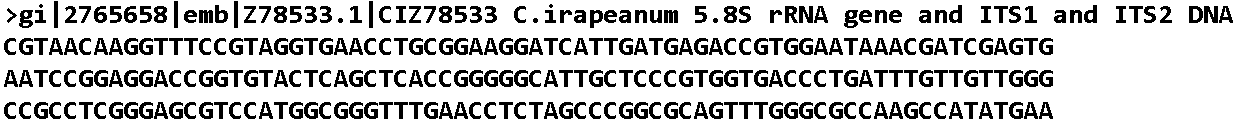**...**

Vamos ver como é disposta a infomação presente em **description**:

In [16]:
from Bio import SeqIO
registro = SeqIO.parse('ls_orchid.fasta', 'fasta')
primeiro_registro = next(registro)
print(primeiro_registro.description)

gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA


Se você verificar manualmente esse arquivo, verá que o nome da espécie está na segunda posição quando separado nos espaços em branco. Isso significa que deveremos quebrar essa informação do registro nos espaços em branco, sendo a posição 1 que essa informação ocupa:

In [17]:
from Bio import SeqIO
todas_especies = []
for registro_seq in SeqIO.parse('ls_orchid.fasta', 'fasta'):
    todas_especies.append(registro_seq.description.split()[1])
print(todas_especies)

['C.irapeanum', 'C.californicum', 'C.fasciculatum', 'C.margaritaceum', 'C.lichiangense', 'C.yatabeanum', 'C.guttatum', 'C.acaule', 'C.formosanum', 'C.himalaicum', 'C.macranthum', 'C.calceolus', 'C.segawai', 'C.pubescens', 'C.reginae', 'C.flavum', 'C.passerinum', 'M.xerophyticum', 'P.schlimii', 'P.besseae', 'P.wallisii', 'P.exstaminodium', 'P.caricinum', 'P.pearcei', 'P.longifolium', 'P.lindenii', 'P.lindleyanum', 'P.sargentianum', 'P.kaiteurum', 'P.czerwiakowianum', 'P.boissierianum', 'P.caudatum', 'P.warszewiczianum', 'P.micranthum', 'P.malipoense', 'P.delenatii', 'P.armeniacum', 'P.emersonii', 'P.niveum', 'P.godefroyae', 'P.bellatulum', 'P.concolor', 'P.fairrieanum', 'P.druryi', 'P.tigrinum', 'P.hirsutissimum', 'P.barbigerum', 'P.henryanum', 'P.charlesworthii', 'P.villosum', 'P.exul', 'P.insigne', 'P.gratrixianum', 'P.primulinum', 'P.victoria', 'P.victoria', 'P.glaucophyllum', 'P.supardii', 'P.kolopakingii', 'P.sanderianum', 'P.lowii', 'P.dianthum', 'P.parishii', 'P.haynaldianum', 'P

Também é possível usar a *list comprehensions*:

In [18]:
from Bio import SeqIO
todas_especies =[
    registro_seq.description.split()[1]
    for registro_seq in SeqIO.parse('ls_orchid.fasta', 'fasta')
]
print(todas_especies)

['C.irapeanum', 'C.californicum', 'C.fasciculatum', 'C.margaritaceum', 'C.lichiangense', 'C.yatabeanum', 'C.guttatum', 'C.acaule', 'C.formosanum', 'C.himalaicum', 'C.macranthum', 'C.calceolus', 'C.segawai', 'C.pubescens', 'C.reginae', 'C.flavum', 'C.passerinum', 'M.xerophyticum', 'P.schlimii', 'P.besseae', 'P.wallisii', 'P.exstaminodium', 'P.caricinum', 'P.pearcei', 'P.longifolium', 'P.lindenii', 'P.lindleyanum', 'P.sargentianum', 'P.kaiteurum', 'P.czerwiakowianum', 'P.boissierianum', 'P.caudatum', 'P.warszewiczianum', 'P.micranthum', 'P.malipoense', 'P.delenatii', 'P.armeniacum', 'P.emersonii', 'P.niveum', 'P.godefroyae', 'P.bellatulum', 'P.concolor', 'P.fairrieanum', 'P.druryi', 'P.tigrinum', 'P.hirsutissimum', 'P.barbigerum', 'P.henryanum', 'P.charlesworthii', 'P.villosum', 'P.exul', 'P.insigne', 'P.gratrixianum', 'P.primulinum', 'P.victoria', 'P.victoria', 'P.glaucophyllum', 'P.supardii', 'P.kolopakingii', 'P.sanderianum', 'P.lowii', 'P.dianthum', 'P.parishii', 'P.haynaldianum', 'P

De modo geral, extrair informações da linha de descrição de um arquivo FASTA não é uma tarefa muito legal. Você pode conseguir suas sequências de maneira bem anotadas em arquivos GenBank e EMBL, uma vez que esse tipo de anotação de informação é muito mais fácil de trabalhar.

### 5.1.5 Modificando os dados

Na seção anterior, vimos como extrair os dados de um **SeqRecord**. Outra tarefa comum é alterar esses dados. Os atributos do **SeqRecord** podem ser modificados diretamente:

In [19]:
from Bio import SeqIO
iterador_registro = SeqIO.parse('ls_orchid.fasta', 'fasta')
primeiro_registro = next(iterador_registro)
primeiro_registro.id

'gi|2765658|emb|Z78533.1|CIZ78533'

In [20]:
primeiro_registro.id = 'novo_id'
primeiro_registro.id

'novo_id'

Observe que se você quiser mudar a forma de como o arquivo FASTA é gerado quando gravado em um arquivo (ver a **Seção 5.5**), você deve modificar os atributos **id** e **description**. Para garantir o mesmo comportamento, é aconcelhável incluir o **id** seuido de um espaço em branco e depois o **description**:

In [21]:
from Bio import SeqIO
iterador_registro = SeqIO.parse('ls_orchid.fasta', 'fasta')
primeiro_registro = next(iterador_registro)
primeiro_registro.id = 'novo_id'
primeiro_registro.description = primeiro_registro.id + ' ' + 'nova descrição'
print(primeiro_registro.format('fasta')[:200])

>novo_id nova descrição
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAA
CGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGT
GACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCT


## 5.2 Analisando sequências de arquivos compactos

Na seção anterior vimos a análise dos dados de uma sequência. Em vez de usar o nome do arquivo, você pode fornecer ao `Bio.SeqIO` um identificador (ver a **Seção 24.1** para mais informações. Capítulo 24: ***link do capítulo 24***). Nessa seção usaremos identificadores para analisar sequências de arquivos compactos.

Como você viu acima, podemos usar as funções **read** ou **parse** com o nome do arquivo para, por exemplo, calcular o tamanho total das sequências no arquivo GenBank:

In [22]:
from Bio import SeqIO
print(sum(len(r) for r in SeqIO.parse('ls_orchid.gbk', 'genbank')))

67518


Aqui usamos um identificador de arquivo, com a instância **with** para fechar o identificador automaticamente quando terminar a análise:

In [23]:
from Bio import SeqIO
with open('ls_orchid.gbk') as identificador:
    print(sum(len(r) for r in SeqIO.parse(identificador, 'genbank')))

67518


Ou podemos usar ainda o modo manual de se abrir e fechar o identificador (materiais mais antigos usam essa forma de escrita):

In [24]:
from Bio import SeqIO
identificador = open('ls_orchid.gbk')
print(sum(len(r) for r in SeqIO.parse(identificador, 'genbank')))
identificador.close()

67518


Suponha que você tenha um arquivo compacto, o que fazer? Esse tipo de distibição de arquivo é muito comum em Linux. Sabendo disso, vamos usar a biblioteca `gzip` (que já vem instalada com o Python) para abrir arquivos compactos e lê-los (o arquivo está no mesmo diretório desde documento):

In [25]:
import gzip
from Bio import SeqIO
with gzip.open('ls_orchid_gzip.gbk.gz', 'rt') as identificador:
    print(sum(len(r) for r in SeqIO.parse(identificador, 'genbank')))

67518


De modo semelhante, podemos usar a biblioteca `bzip2` (já vem instalada com o Python). O arquivo para exemplo está no mesmo diretório desde documento:

In [26]:
import bz2
from Bio import SeqIO
with bz2.open('ls_orchid_bzip2.gbk.bz2', 'rt') as identificador:
    print(sum(len(r) for r in SeqIO.parse(identificador, 'genbank')))

67518


O código acima mostra uma variante do gzip (GNU Zip) chamada de BGZF (Blocked GNU Zip Format), que pode ser tratado como um arquivo gzip comum para leitura, mas possui vantagens para acesso aleatório; falaremos disso mais tarde na **Seção 5.4.4**.

## 5.3 Analisando sequência da Internet

Na seção anterior, vimos a análise de sequências armazendas em arquivos (usando o próprio nome ou um identificador) e em arquivos compactados (usando identificador). Agora usaremos o `Bio.SeqIO` com um outro tipo de identificador, a Internet para baixar e analisar as sequências em banco de dados online.

Note que você *pode* fazer o download e a análise dos dados em um objeto **SeqRecord** de uma vez, mas isso não diz que é uma boa ideia. De modo geral, você deve baixar as sequências uma vez e salvá-la em um arquivo para usá-la mais vezes.

### 5.3.1 Análise de registros GenBank da Internet

Na **Seção 9.6** do Capítulo 9 (https://github.com/GTL98/biopython_br/tree/main/Cap%209%20-%20Acessando%20bancos%20de%20dados%20Entrez%20do%20NCBI) falaremos sobre a interface Entrez EFetch com mais detalhes, mas agora vamos apenas nos conectar ao NCBI e pegar várias sequências do gênero *Opuntia* (Figo da Índia) do GenBank.

Antes de tudo, vamos buscar somente um registro. Se você não se importa com o download de anotações e características, baixa um arquivo FASTA é uma boa escolha, já que são compactos. Lembre-se, quando você estiver trabalhando com apenas um registro, use a função **read** de `Bio.SeqIO`:

In [27]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = 'teste@exemplo.com'  # sempre diga ao NCBI quem é você
with Entrez.efetch(db='nucleotide', rettype='fasta', retmode='text', id='6273291') as identificador:
    registro_seq = SeqIO.read(identificador, 'fasta')
print(f'{registro_seq.id} com {len(registro_seq.features)} características.')

AF191665.1 com 0 características.


O NCBI sempre permitirá que você selecione o tipo de arquivo que deseja trabalhar. Desde o outono de 2009, a API do Entrez EFetch permitia que você use o 'genbank' como o tipo retornado dos dados. Contudo, o NCBI insiste em usar o tipo retornado de dados como 'gb' ('gp' para proteínas), como descito no *EFetch for Sequence and other Molecular Biology Databases* (https://www.ncbi.nlm.nih.gov/books/NBK3837/). Como resultado, desde a versão 1.50 do Biopython; 'gb' pode ser usado como substituto para 'genbank' em `Bio.SeqIO`:

In [28]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = 'teste@exemplo.com'
with Entrez.efetch(db='nucleotide', rettype='gb', retmode='text', id='6273291') as identificador:
    registro_seq = SeqIO.read(identificador, 'gb')
print(f'{registro_seq.id} com {len(registro_seq.features)} características.')

AF191665.1 com 3 características.


Observe que agora temos três características.

Agora vamos buscar por vários registros. Como o identificador agora terá múltiplos registros, usaremos a função **parse** de `Bio.SeqIO`:

In [29]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = 'teste@exemplo.com'
with Entrez.efetch(db='nucleotide', rettype='gb', retmode='text', id='6273291,6273290,6273289') as identificador:
    for registro_seq in SeqIO.parse(identificador, 'gb'):
        print(f'{registro_seq.id} {registro_seq.description[:50]}...')
        print(f'Tamanho da sequência: {len(registro_seq)}, {len(registro_seq.features)}, '
              f'de: {registro_seq.annotations["source"]}')
        print('\n')

AF191665.1 Opuntia marenae rpl16 gene; chloroplast gene for c...
Tamanho da sequência: 902, 3, de: chloroplast Grusonia marenae


AF191664.1 Opuntia clavata rpl16 gene; chloroplast gene for c...
Tamanho da sequência: 899, 3, de: chloroplast Grusonia clavata


AF191663.1 Opuntia bradtiana rpl16 gene; chloroplast gene for...
Tamanho da sequência: 899, 3, de: chloroplast Grusonia bradtiana




Veja o Capítulo 9 (https://github.com/GTL98/biopython_br/tree/main/Cap%209%20-%20Acessando%20bancos%20de%20dados%20Entrez%20do%20NCBI) para mais informações sobe o módulo `Bio.Entrez` e leiaa **Seção 9.1** sobre as diretrizes do NCBI para usar o Entrez.

### 5.3.2 Análise de sequências SwissProt da Internet

Agora vamos usar um identificador para baixar um arquivo SwissProt do ExPASy, que serão mais detalhados no Capítulo 10 (https://github.com/GTL98/biopython_br/tree/main/Cap%2010%20-%20Swiss-Prot%20e%20ExPASy). Como mencionado acima, quando você esteja trabalhando somente com um registro, use a função **read** de `Bio.SeqIO`: 

In [30]:
from Bio import ExPASy
from Bio import SeqIO
with ExPASy.get_sprot_raw('O23729') as identificador:
    registro_seq = SeqIO.read(identificador, 'swiss')
print(registro_seq.id)
print(registro_seq.name)
print(registro_seq.description)
print(repr(registro_seq.seq))
print(f'Tamanho {len(registro_seq)}')
print(registro_seq.annotations['keywords'])

O23729
CHS3_BROFI
RecName: Full=Chalcone synthase 3; EC=2.3.1.74; AltName: Full=Naringenin-chalcone synthase 3;
Seq('MAPAMEEIRQAQRAEGPAAVLAIGTSTPPNALYQADYPDYYFRITKSEHLTELK...GAE')
Tamanho 394
['Acyltransferase', 'Flavonoid biosynthesis', 'Transferase']


## 5.4 Arquivos de sequência como dicionários

Fazer um loop através de um iterador **SeqIO.parse** pode esgotar o arquivo. Para arquivos auto indexador, como o formato de arquivo twoBit, o valor retornado pelo iterador pode ser usado como o valor em um dicionário, permitindo acesso aleatório ao conteúdo da sequência. Como nesse caso a análise é feita sob demanda, o arquivo deve permanecer aberto a todo momento enquanto os dados da sequência estiverem sendo acessados (o arquivo usado de exemplo está no mesmo diretório que este documento):

In [31]:
from Bio import SeqIO
identificador = open('sequence.bigendian.2bit', 'rb')
registros = SeqIO.parse(identificador, 'twobit')

In [32]:
registros.keys()

dict_keys(['seq11111', 'seq222', 'seq3333', 'seq4', 'seq555', 'seq6'])

In [33]:
registros['seq222']

SeqRecord(seq=Seq('TTGATCGGTGACAAATTTTTTACAAAGAACTGTAGGACTTGCTACTTCTCCCTC...ACA'), id='seq222', name='<unknown name>', description='<unknown description>', dbxrefs=[])

In [34]:
registros['seq222'].seq

Seq('TTGATCGGTGACAAATTTTTTACAAAGAACTGTAGGACTTGCTACTTCTCCCTC...ACA')

In [35]:
identificador.close()
registros['seq222'].seq

ValueError: cannot retrieve sequence: file is closed

Para outros formatos de arquivo, o `Bio.SeqIO` fornece três funções relacionadas que permitem acesso ao dicionário com os dados de um arquivo com múltiplas sequências. Isso gera uma troca entre flexibilidade e uso de memória. Em resumo:
- `Bio.SeqIO.to_dict()`: é mais flexível mas demanda de mais memória (veja a **Seção 5.4.1**). Essa função basicamente constrói um dicionário Python com cada entrada mantida como um objeto **SeqRecord** na memória, permitindo você modificar os regitros;

- `Bio.SeqIO.index()`: é um meio termo, atua como um leitor de dicionários e analisador de sequências em objetos **SeqRecord** sob demanda (veja a **Seção 5.4.2**) e;

- `Bio.SeqIO.index_db()`: também atua como um leitor de dicionário, mas armazena os identificadores e os *offsets* em um arquivo no disco (como um banco de dados SQLite3), o que indica que tem requisitos de memória bem baixos (veja a **Seção 5.4.3**), mas será um pouco mais lento.

Na **Seção 5.4.5** você terá uma visão mais geral.

### 5.4.1 Arquivos de sequência como dicionários (na memória)

A próxima coisa que faremos com nossos onipresentes arquivos de orquídeas é mostrar como indexá-los e acessá-los como um banco de dados usando dicionários Python (como hash em Perl). Isso é uma mão na roda para moderar arquivos grandes onde você necessita acessar somente alguns dados do arquivo, é um jeito gambiarra de se fazer, mas funciona muito bem. Para lidar com arquivos maiores onde a memória torna-se um problema, veja a **Seção 5.4.2**.

Você pode usar o `Bio.SeqIO.to_dict` para fazer um dicionário com os registros (na memória). Por padrão, isso é usado para cada identificador do registro (i.e. o argumento **id**) com a chave. Vamos usar em nosso arquivo GenBank:

In [36]:
from Bio import SeqIO
dic_orquidea = SeqIO.to_dict(SeqIO.parse('ls_orchid.gbk', 'gb'))

É apenas requerido um argmento para a função **to_dict**, uma lista ou gerador fornecido pelos objetos **SeqRecord**. Aqui nós usamos a saída da função **parse**. Como o nome sugere, é a função **to_dict** retorna um dicionário Python.

Desde que a variável **dic_orquidea** é um dicionário Python, podemos olhar para todas as chaves acessíveis:

In [37]:
len(dic_orquidea)

94

In [38]:
list(dic_orquidea.keys())

['Z78533.1',
 'Z78532.1',
 'Z78531.1',
 'Z78530.1',
 'Z78529.1',
 'Z78527.1',
 'Z78526.1',
 'Z78525.1',
 'Z78524.1',
 'Z78523.1',
 'Z78522.1',
 'Z78521.1',
 'Z78520.1',
 'Z78519.1',
 'Z78518.1',
 'Z78517.1',
 'Z78516.1',
 'Z78515.1',
 'Z78514.1',
 'Z78513.1',
 'Z78512.1',
 'Z78511.1',
 'Z78510.1',
 'Z78509.1',
 'Z78508.1',
 'Z78507.1',
 'Z78506.1',
 'Z78505.1',
 'Z78504.1',
 'Z78503.1',
 'Z78502.1',
 'Z78501.1',
 'Z78500.1',
 'Z78499.1',
 'Z78498.1',
 'Z78497.1',
 'Z78496.1',
 'Z78495.1',
 'Z78494.1',
 'Z78493.1',
 'Z78492.1',
 'Z78491.1',
 'Z78490.1',
 'Z78489.1',
 'Z78488.1',
 'Z78487.1',
 'Z78486.1',
 'Z78485.1',
 'Z78484.1',
 'Z78483.1',
 'Z78482.1',
 'Z78481.1',
 'Z78480.1',
 'Z78479.1',
 'Z78478.1',
 'Z78477.1',
 'Z78476.1',
 'Z78475.1',
 'Z78474.1',
 'Z78473.1',
 'Z78472.1',
 'Z78471.1',
 'Z78470.1',
 'Z78469.1',
 'Z78468.1',
 'Z78467.1',
 'Z78466.1',
 'Z78465.1',
 'Z78464.1',
 'Z78463.1',
 'Z78462.1',
 'Z78461.1',
 'Z78460.1',
 'Z78459.1',
 'Z78458.1',
 'Z78457.1',
 'Z78456.1',

No Python 3, os métodos do dicionário (como **keys** e **values**) são iteradores ao invés de listas. Se você realmente quiser, pode até olhar todos os registros de uma só vez:

In [39]:
list(dic_orquidea.values())

[SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC'), id='Z78533.1', name='Z78533', description='C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA', dbxrefs=[]),
 SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC'), id='Z78532.1', name='Z78532', description='C.californicum 5.8S rRNA gene and ITS1 and ITS2 DNA', dbxrefs=[]),
 SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA'), id='Z78531.1', name='Z78531', description='C.fasciculatum 5.8S rRNA gene and ITS1 and ITS2 DNA', dbxrefs=[]),
 SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT'), id='Z78530.1', name='Z78530', description='C.margaritaceum 5.8S rRNA gene and ITS1 and ITS2 DNA', dbxrefs=[]),
 SeqRecord(seq=Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA'), id='Z78529.1', name='Z78529', description='C.lichiangense 5.8S rRNA gene and ITS1 and ITS2 DNA', dbxrefs=[]),
 SeqRecord(seq=Seq('CGTAACAAGGTT

Você pode acessar um único objeto **SeqRecord** através das chaves e manipulação que já fizemos:

In [40]:
registro_seq = dic_orquidea['Z78475.1']
print(registro_seq.description)

P.supardii 5.8S rRNA gene and ITS1 and ITS2 DNA


In [41]:
registro_seq.seq

Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATCACAT...GGT')

É muito fácil criar um 'banco de dados' na memória com os registros do arquivo GenBank. Agora vamos fazer a mesma coisa com o arquivo FASTA.

Vale ressaltar que se você tiver o conhecimeto básico em Python pode fazer um dicionário como este 'na mão'. Contudo, os métodos de construção de um dicionário não lidam muito bem com chaves repetidas. Usar a função **to_dict** permite que seja verificada a duplicidade de chaves e retornar uma exceção caso exista essa duplicidade.

#### 5.4.1.1 Especificando as chaves do dicionário

Usaremos o mesmo código acima, mas com um arquivo FASTA:

In [42]:
from Bio import SeqIO
dic_orquidea = SeqIO.to_dict(SeqIO.parse('ls_orchid.fasta', 'fasta'))

Agora as chaves são assim:

In [43]:
print(dic_orquidea.keys())

dict_keys(['gi|2765658|emb|Z78533.1|CIZ78533', 'gi|2765657|emb|Z78532.1|CCZ78532', 'gi|2765656|emb|Z78531.1|CFZ78531', 'gi|2765655|emb|Z78530.1|CMZ78530', 'gi|2765654|emb|Z78529.1|CLZ78529', 'gi|2765652|emb|Z78527.1|CYZ78527', 'gi|2765651|emb|Z78526.1|CGZ78526', 'gi|2765650|emb|Z78525.1|CAZ78525', 'gi|2765649|emb|Z78524.1|CFZ78524', 'gi|2765648|emb|Z78523.1|CHZ78523', 'gi|2765647|emb|Z78522.1|CMZ78522', 'gi|2765646|emb|Z78521.1|CCZ78521', 'gi|2765645|emb|Z78520.1|CSZ78520', 'gi|2765644|emb|Z78519.1|CPZ78519', 'gi|2765643|emb|Z78518.1|CRZ78518', 'gi|2765642|emb|Z78517.1|CFZ78517', 'gi|2765641|emb|Z78516.1|CPZ78516', 'gi|2765640|emb|Z78515.1|MXZ78515', 'gi|2765639|emb|Z78514.1|PSZ78514', 'gi|2765638|emb|Z78513.1|PBZ78513', 'gi|2765637|emb|Z78512.1|PWZ78512', 'gi|2765636|emb|Z78511.1|PEZ78511', 'gi|2765635|emb|Z78510.1|PCZ78510', 'gi|2765634|emb|Z78509.1|PPZ78509', 'gi|2765633|emb|Z78508.1|PLZ78508', 'gi|2765632|emb|Z78507.1|PLZ78507', 'gi|2765631|emb|Z78506.1|PLZ78506', 'gi|2765630|emb|Z

Se você observou bem, essas strings são as mesmas que as vistas na **Seção 2.4.1** do Capítulo 2 (https://github.com/GTL98/biopython_br/tree/main/Cap%202%20-%20O%20que%20podemos%20fazer%20com%20o%20Biopython). Suponha que você prefere ter as chaves de um modo diferente, como só os números de acesso. Sabendo disso, a função **to_dict** possui o parâmetro **key_function**, onde podemos definir uma função que será usada nas chaves do resgistro. Vale ressaltar que o código abaixo serve para o arquivo de exemplo, fique atento as atualizações do arquivo FASTA para mudar a função sempre que mudar algo no arquivo FASTA:

In [44]:
def num_acesso(registro):
    """Entrgar um objeto SeqRecord e retornar o número de acesso como uma string
    
    e.g. 'gi|2765613|emb|Z78488.1|PTZ78488' --> 'Z78488.1'
    """
    partes = registro.id.split('|')
    assert len(partes) == 5 and partes[0] == 'gi' and partes[2] == 'emb'
    return partes[3]

Então podemos entregar essa função para **to_dict** para a construção do dicionário:

In [45]:
from Bio import SeqIO
dic_orquidea = SeqIO.to_dict(SeqIO.parse('ls_orchid.fasta', 'fasta'), key_function=num_acesso)

Finalmente, como desejado, as novas chaves do dicionário:

In [46]:
print(dic_orquidea.keys())

dict_keys(['Z78533.1', 'Z78532.1', 'Z78531.1', 'Z78530.1', 'Z78529.1', 'Z78527.1', 'Z78526.1', 'Z78525.1', 'Z78524.1', 'Z78523.1', 'Z78522.1', 'Z78521.1', 'Z78520.1', 'Z78519.1', 'Z78518.1', 'Z78517.1', 'Z78516.1', 'Z78515.1', 'Z78514.1', 'Z78513.1', 'Z78512.1', 'Z78511.1', 'Z78510.1', 'Z78509.1', 'Z78508.1', 'Z78507.1', 'Z78506.1', 'Z78505.1', 'Z78504.1', 'Z78503.1', 'Z78502.1', 'Z78501.1', 'Z78500.1', 'Z78499.1', 'Z78498.1', 'Z78497.1', 'Z78496.1', 'Z78495.1', 'Z78494.1', 'Z78493.1', 'Z78492.1', 'Z78491.1', 'Z78490.1', 'Z78489.1', 'Z78488.1', 'Z78487.1', 'Z78486.1', 'Z78485.1', 'Z78484.1', 'Z78483.1', 'Z78482.1', 'Z78481.1', 'Z78480.1', 'Z78479.1', 'Z78478.1', 'Z78477.1', 'Z78476.1', 'Z78475.1', 'Z78474.1', 'Z78473.1', 'Z78472.1', 'Z78471.1', 'Z78470.1', 'Z78469.1', 'Z78468.1', 'Z78467.1', 'Z78466.1', 'Z78465.1', 'Z78464.1', 'Z78463.1', 'Z78462.1', 'Z78461.1', 'Z78460.1', 'Z78459.1', 'Z78458.1', 'Z78457.1', 'Z78456.1', 'Z78455.1', 'Z78454.1', 'Z78453.1', 'Z78452.1', 'Z78451.1', 'Z784

Nada muito complicado, espero!

#### 5.4.1.2 Indexar um dicionário usando a soma de verificação SEGUID

Como outro exemplo do trabalho com dicionários do objetos **SeqRecord**, vamos usar a função de soma de verificação SEGUID. Essa é uma soma de verificação recente e as colições devem ser bem raras (i.e. duas sequências diferentes com a mesma soma de verificação), uma melhoria na soma de verificação CRC64.

Vamos trabalhar novamente com o nosso arquivo GenBank:

In [47]:
from Bio import SeqIO
from Bio.SeqUtils.CheckSum import seguid
for registro in SeqIO.parse('ls_orchid.gbk', 'gb'):
    print(registro.id, seguid(registro.seq))

Z78533.1 JUEoWn6DPhgZ9nAyowsgtoD9TTo
Z78532.1 MN/s0q9zDoCVEEc+k/IFwCNF2pY
Z78531.1 xN45pACrTnmBH8a8Y9cWSgoLrwE
Z78530.1 yMhI5UUQfFOPcoJXb9B19XUyYlY
Z78529.1 s1Pnjq9zoSHoI/CG9jQr4GyeMZY
Z78527.1 MRf6S1OYhtbdPVS845oCmLTqMgo
Z78526.1 QCDzCtL6AKuc+h4UQDD6wFjz3Vs
Z78525.1 Zh/FImuuDRmmM/5fXaCYAHS7wo0
Z78524.1 hKw0C1fPNpi2KUM6iV0/8IadTX0
Z78523.1 71sZ82r6eAOBpwZs2solBr/biUs
Z78522.1 /8BBi+Dm0kpdHcYREmyKKbQSzKQ
Z78521.1 VrTEM/VCul51xFo2OBDsZKgiFTI
Z78520.1 //QmLx77H51zTbd8LR+71pXY9ew
Z78519.1 rb1CrF1Gbr6UDMLeRLPOWZaKIBc
Z78518.1 38aHi4XYVQUZkydCrxSVn2SYmCM
Z78517.1 swq+/4vgyWJssxu11Lcx+2IxNC4
Z78516.1 +CFmEqzVnCluPe39ytjiLRL7dvU
Z78515.1 ZG15PBF2qqDhj75CGTDiRAuT8Is
Z78514.1 Rvx7kJnPQJKgBZzNZ5dx+CnksgY
Z78513.1 IjG6hja6MS3M/CzKI9AuxFnjFxc
Z78512.1 EqkQVKx2qD2+qLp/W6hwQ1GjKo8
Z78511.1 cnm0fCmTFbHMlTN6t7i/ee4ydDc
Z78510.1 GVd6GFv7uF0uq66u4gZB95scKFY
Z78509.1 tS2JwZWXudMwdlyJBXKxjm/G1Ik
Z78508.1 e85/JrwCy5T7J+zptVbhBw8govc
Z78507.1 +pQOTxhX/lW2fFWnZ7hmBDbLz9w
Z78506.1 AUA6LlNQUBe4Vtui414zw6evNQY
Z

Agora, vamos chamar a função **to_dict** com o parâmetro **key_function** transformando um objeto **SeqRecord** em string. Nós não podemos usar a função **seguid** diretamente porque ela espera que seja entregada um objeto **Seq** ou uma string. Porém, podemos usar a função **lambda** para criar uma função 'única' e forncecer à **to_dict**:

In [48]:
from Bio import SeqIO
from Bio.SeqUtils.CheckSum import seguid
dic_seguid = SeqIO.to_dict(SeqIO.parse('ls_orchid.gbk', 'gb'), lambda rec: seguid(rec.seq))
registro = dic_seguid['MN/s0q9zDoCVEEc+k/IFwCNF2pY']

In [49]:
print(registro.id)

Z78532.1


In [50]:
print(registro.description)

C.californicum 5.8S rRNA gene and ITS1 and ITS2 DNA


Foi retornado o registro Z78532.1, a segunda entrada do arquivo.

### 5.4.2 Arquivos de sequência como dicionários (arquivos indexados)

Como mostrado nos exemplos anteriores, usar a função **to_dict** de `Bio.SeqIO` é bem flexível. Todavia, devido tudo ser colocado na memória, o tamanho do arquivo que você pode trabalhar será limitado pela memória RAM. De modo geral, esse modo é usado somente para pequenos e médios arquivos.

Para grandes arquivos, você deve considerar o uso da função **index** de `Bio.SeqIO` que trabalhar um pouco diferente. Embora ainda retorne um dicionário como um objeto, essa função *não* guarda *tudo* na memória. Ao invés disso, a função apenas registra onde cada registro está no arquivo quando perguntada por um registro em questão ou uma análise por demanda.

Como exemplo, vamos usar nosso velho conhecido arquivo GenBank:

In [51]:
from Bio import SeqIO
dic_orquidea = SeqIO.index('ls_orchid.gbk', 'gb')

In [52]:
len(dic_orquidea)

94

In [53]:
list(dic_orquidea.keys())

['Z78533.1',
 'Z78532.1',
 'Z78531.1',
 'Z78530.1',
 'Z78529.1',
 'Z78527.1',
 'Z78526.1',
 'Z78525.1',
 'Z78524.1',
 'Z78523.1',
 'Z78522.1',
 'Z78521.1',
 'Z78520.1',
 'Z78519.1',
 'Z78518.1',
 'Z78517.1',
 'Z78516.1',
 'Z78515.1',
 'Z78514.1',
 'Z78513.1',
 'Z78512.1',
 'Z78511.1',
 'Z78510.1',
 'Z78509.1',
 'Z78508.1',
 'Z78507.1',
 'Z78506.1',
 'Z78505.1',
 'Z78504.1',
 'Z78503.1',
 'Z78502.1',
 'Z78501.1',
 'Z78500.1',
 'Z78499.1',
 'Z78498.1',
 'Z78497.1',
 'Z78496.1',
 'Z78495.1',
 'Z78494.1',
 'Z78493.1',
 'Z78492.1',
 'Z78491.1',
 'Z78490.1',
 'Z78489.1',
 'Z78488.1',
 'Z78487.1',
 'Z78486.1',
 'Z78485.1',
 'Z78484.1',
 'Z78483.1',
 'Z78482.1',
 'Z78481.1',
 'Z78480.1',
 'Z78479.1',
 'Z78478.1',
 'Z78477.1',
 'Z78476.1',
 'Z78475.1',
 'Z78474.1',
 'Z78473.1',
 'Z78472.1',
 'Z78471.1',
 'Z78470.1',
 'Z78469.1',
 'Z78468.1',
 'Z78467.1',
 'Z78466.1',
 'Z78465.1',
 'Z78464.1',
 'Z78463.1',
 'Z78462.1',
 'Z78461.1',
 'Z78460.1',
 'Z78459.1',
 'Z78458.1',
 'Z78457.1',
 'Z78456.1',

In [54]:
registro_seq = dic_orquidea['Z78475.1']
print(registro_seq.description)

P.supardii 5.8S rRNA gene and ITS1 and ITS2 DNA


In [55]:
registro_seq.seq

Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATCACAT...GGT')

In [56]:
dic_orquidea.close()

Observe que a função **index** não necessita de um identificador, somente o nome do arquivo. Há boas razões para isso, mas é um pouco técnica a explicação. O segundo argumento é o formato de arquivo. Você pode usar diversos formatos de arquivos, incluindo FASTA e FASTQ (veja mais na **Seção 20.1.11** no Capítulo 20: ***link do capítulo 20***). Contudo, arquivos de alinhamento como PHYLIP ou Clustal não são suportados. Finalmente, como argumento opcional, você pode forncer uma função chave.

Abaixo está o mesmo código, mas usando um arquivo FASTA:

In [57]:
from Bio import SeqIO
dic_orquidea = SeqIO.index('ls_orchid.fasta', 'fasta')

In [58]:
len(dic_orquidea)

94

In [59]:
list(dic_orquidea.keys())

['gi|2765658|emb|Z78533.1|CIZ78533',
 'gi|2765657|emb|Z78532.1|CCZ78532',
 'gi|2765656|emb|Z78531.1|CFZ78531',
 'gi|2765655|emb|Z78530.1|CMZ78530',
 'gi|2765654|emb|Z78529.1|CLZ78529',
 'gi|2765652|emb|Z78527.1|CYZ78527',
 'gi|2765651|emb|Z78526.1|CGZ78526',
 'gi|2765650|emb|Z78525.1|CAZ78525',
 'gi|2765649|emb|Z78524.1|CFZ78524',
 'gi|2765648|emb|Z78523.1|CHZ78523',
 'gi|2765647|emb|Z78522.1|CMZ78522',
 'gi|2765646|emb|Z78521.1|CCZ78521',
 'gi|2765645|emb|Z78520.1|CSZ78520',
 'gi|2765644|emb|Z78519.1|CPZ78519',
 'gi|2765643|emb|Z78518.1|CRZ78518',
 'gi|2765642|emb|Z78517.1|CFZ78517',
 'gi|2765641|emb|Z78516.1|CPZ78516',
 'gi|2765640|emb|Z78515.1|MXZ78515',
 'gi|2765639|emb|Z78514.1|PSZ78514',
 'gi|2765638|emb|Z78513.1|PBZ78513',
 'gi|2765637|emb|Z78512.1|PWZ78512',
 'gi|2765636|emb|Z78511.1|PEZ78511',
 'gi|2765635|emb|Z78510.1|PCZ78510',
 'gi|2765634|emb|Z78509.1|PPZ78509',
 'gi|2765633|emb|Z78508.1|PLZ78508',
 'gi|2765632|emb|Z78507.1|PLZ78507',
 'gi|2765631|emb|Z78506.1|PLZ78506',
 

#### 5.4.2.1 Especificando as chaves do dicionário

Suponha que você queira usar as mesmas chaves usadas anteriormente, como fazer? Assim como fizemos na função **to_dict** na **Seção 5.4.1.1**, você precisará escrever uma função para modificar a identificação no arquivo FASTA para a chave que você quer. Para isso, vamos usar a função **num_acesso** que fizemos anteriormente com algumas modificações junto com a função **index** dessa vez:

In [60]:
def obter_chave(identificador):
    """Entrgar um objeto SeqRecord e retornar o número de acesso como uma string
    
    e.g. 'gi|2765613|emb|Z78488.1|PTZ78488' --> 'Z78488.1'
    """
    partes = identificador.split('|')
    assert len(partes) == 5 and partes[0] == 'gi' and partes[2] == 'emb'
    return partes[3]

In [61]:
from Bio import SeqIO
dic_orquidea = SeqIO.index('ls_orchid.fasta', 'fasta', key_function=obter_chave)

In [62]:
list(dic_orquidea.keys())

['Z78533.1',
 'Z78532.1',
 'Z78531.1',
 'Z78530.1',
 'Z78529.1',
 'Z78527.1',
 'Z78526.1',
 'Z78525.1',
 'Z78524.1',
 'Z78523.1',
 'Z78522.1',
 'Z78521.1',
 'Z78520.1',
 'Z78519.1',
 'Z78518.1',
 'Z78517.1',
 'Z78516.1',
 'Z78515.1',
 'Z78514.1',
 'Z78513.1',
 'Z78512.1',
 'Z78511.1',
 'Z78510.1',
 'Z78509.1',
 'Z78508.1',
 'Z78507.1',
 'Z78506.1',
 'Z78505.1',
 'Z78504.1',
 'Z78503.1',
 'Z78502.1',
 'Z78501.1',
 'Z78500.1',
 'Z78499.1',
 'Z78498.1',
 'Z78497.1',
 'Z78496.1',
 'Z78495.1',
 'Z78494.1',
 'Z78493.1',
 'Z78492.1',
 'Z78491.1',
 'Z78490.1',
 'Z78489.1',
 'Z78488.1',
 'Z78487.1',
 'Z78486.1',
 'Z78485.1',
 'Z78484.1',
 'Z78483.1',
 'Z78482.1',
 'Z78481.1',
 'Z78480.1',
 'Z78479.1',
 'Z78478.1',
 'Z78477.1',
 'Z78476.1',
 'Z78475.1',
 'Z78474.1',
 'Z78473.1',
 'Z78472.1',
 'Z78471.1',
 'Z78470.1',
 'Z78469.1',
 'Z78468.1',
 'Z78467.1',
 'Z78466.1',
 'Z78465.1',
 'Z78464.1',
 'Z78463.1',
 'Z78462.1',
 'Z78461.1',
 'Z78460.1',
 'Z78459.1',
 'Z78458.1',
 'Z78457.1',
 'Z78456.1',

Fica fácil quando você sabe como fazer né?

#### 5.4.2.2 Obter os dados brutos para um registro

Um dicionário vindo do `Bio.SeqIO.index()` entrega para você cada entrada de um objeto **SeqRecord**. Entretanto, algumas vezes é melhor obter os dados brutos originais diretamente do arquivo. Para isso, basta usar o método **get_raw** que precisa somente de um argumento (o identificador do registro) e te retorna uma string de bytes (extraída do arquivo sem modificação).

Um bom exemplo é extrair um subconjunto de registros vindos de um grande arquivo onde também o `Bio.SeqIO.write()` não suporta (ainda) o formato de saída (e.g. um texto de um arquivo SwissProt) ou  onde você precisa preservar um texto exatamente como está (e.g. saídas do Biopython com arquivos GenBank e EMBL ainda não preservam os últimos bits de informação).

Vamos supor que você tenha baixado todo o UniProt no formato de arquivo SwissProt do site FTP (https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/complete/uniprot_sprot.dat.gz). Vamos descompactá-lo e usar o arquivo para extrair os diversos registros:

In [63]:
from Bio import SeqIO
uniprot = SeqIO.index('uniprot_sprot.dat', 'swiss')
with open('selected.dat', 'wb') as identificador_saida:
    for acc in ['P33487', 'P19801', 'P13689', 'Q8JZQ5', 'Q9TRC7']:
        identificador_saida.write(uniprot.get_raw(acc))

O arquivo gerado pelo código acima está no mesmo diretório que este documento.

Observe que o modo de abertura de arquivo foi feita com o modo de escrita em binário. Isso é importante porque o método **get_raw** retorna uma string em bytes.

Na **Seção 20.1.5** do Capítulo 20 (***link do capítulo 20***) há um exemplo completo de como usar a função **index** para classificar um grande arquivo de sequência, sem carregar tudo na memória de uma vez.

### 5.4.3 Arquivos de sequência como dicionários (arquivos indexados de banco de dados)

A versão 1.57 do Biopython touxe um módulo alternativo, o `Bio.SeqIO.index_db()`, que pode trabalhar com arquivos realmente grandes, uma vez que armazenam os registros como um arquivo no disco (usando a base de dados SQLite3) ao invés de armazenar tudo na memória. Você pode também indexar vários arquivos juntos, desde que todos os identificadores sejam únicos.

O módulo `Bio.SeqIO.index_db()` precisa de três argumentos:
- O nome do arquivo de índice, sugiro que use a extensão **.idx**. Esse arquivo de índice é um banco de dados SQLite3;

- Lista dos nomes dos arquivos de sequências para indexar (ou o nome do arquivo) e;

- Formato do arquivo.

Como um exemplo, considere o arquivo GenBank do NCBI FTP (https://ftp.ncbi.nih.gov/genbank/), que são os arquivo GenBank compartados com gzip.

A partir da versão 210 do GenBank, há 38 arquivos que compõem as sequências virais, gbvrl1.seq,...,gbvrl38.seq; tendo um tamanho de 8GB quando descompatadas e contêm cerca de 2 milhões de registros.

Se você tiver muito interesse em vírus, você pode baixar todos os arquivos pela linha de comando facilmente com o comando **rsync** e descompactá-las com o **gunzip** (funciona somente no Linux).

A menos que você se preocupe com vírus, são muitos arquivos para baixar apenas para esse exemplo. Vamos então baixar os quatro primeiros blocos, gbvrl1; gbvrl2; gbvrl3 e gbvrl4, (cerca de 280MB quando compactados) 2; descompactá-los (cerca de 1,9GB).

Agora, vamos indexar esses arquivos GenBank da seguinte maneira:

In [64]:
import glob
from Bio import SeqIO
arquivos = glob.glob('gbvrl*.seq')
print(f'{len(arquivos)} arquivos para indexar.')

4 arquivos para indexar.


In [65]:
gb_vrl = SeqIO.index_db('gbvrl.idx', arquivos, 'gb')
print(f'{len(gb_vrl)} sequências indexadas')

453791 sequências indexadas


Indexar todos os arquivos de vírus do GenBank leverá muitos minutos, mas apenas esses quatro levou, em meu computador, cerca de 2 minutos.

Contudo, feito isso, repetir esse etapa recarregará o arquivo gbvrl.idx em uma fração de segundos.

Você pode usar o índice para leitura em um dicionário Python, sem se preocupar com o arquivo de origem da sequência:

In [66]:
print(gb_vrl['AB811634.1'].description)

Equine encephalosis virus NS3 gene, complete cds, isolate: Kimron1


#### 5.4.3.1 Obtando os dados brutos por registro

Assim como na função **index** vista na **Seção 5.4.2.2**, podemos pegar os dados brutos para cada registro:

In [67]:
print(gb_vrl.get_raw('AB811634.1'))

b'LOCUS       AB811634                 723 bp    RNA     linear   VRL 17-JUN-2015\nDEFINITION  Equine encephalosis virus NS3 gene, complete cds, isolate: Kimron1.\nACCESSION   AB811634\nVERSION     AB811634.1\nKEYWORDS    .\nSOURCE      Equine encephalosis virus\n  ORGANISM  Equine encephalosis virus\n            Viruses; Riboviria; Orthornavirae; Duplornaviricota;\n            Resentoviricetes; Reovirales; Reoviridae; Sedoreovirinae;\n            Orbivirus.\nREFERENCE   1\n  AUTHORS   Westcott,D., Mildenberg,Z., Bellaiche,M., McGowan,S.L.,\n            Grierson,S.S., Choudhury,B. and Steinbach,F.\n  TITLE     Evidence for the circulation of equine encephalosis virus in Israel\n            since 2001\n  JOURNAL   PLoS ONE 8 (8), E70532 (2013)\n   PUBMED   23950952\n  REMARK    DOI:10.1371/journal.pone.0070532\n            Erratum:[PLoS One. 2013;8(9).\n            doi:10.1371/annotation/4875ab92-466a-4f5f-b9c7-bc0e168a8f9b.\n            Wescott, David G [corrected to Westcott, David G]

### 5.4.4 Indexando arquivos compactos

Muitas vezes quando você estiver indexando um arquivo de sequência que pode ser um pouco maior que o comum, então uma solução será compatá-lo. Infelizmente, o acesso aleatório é complicado com os arquivos em gzip e bzip2. Por conta disso, o BGZF (Blocked GNU Zip Format) pode ser uma ótima ajuda. Ele é uma variante do gzip (pode ser descompatado usando as ferramentas padrão do gzip) popularizado pelo formato de arquibo BAM, samtools e tabix.

Para criar um arquivo compactado BGZF, você pode usar a linha de comando bgzip que vem com a samtools. Em nosso exemplo, usaremos a extensão **.bgz** para distinguir dos arqivos compactados pelos gzip (extensão **.gz**. Você pode usar o módulo `Bio.bgzf` para ler e escrever arquivos BGZF no Python.

As funções **index** e **index_db** podem usar arquivos BGZF. Por exemplo, vamos começar usando um arquivo GenBank sem estar compactado:

In [68]:
from Bio import SeqIO
dic_orquidea = SeqIO.index('ls_orchid.gbk', 'gb')
len(dic_orquidea)

94

In [69]:
dic_orquidea.close()

Você pode compactar o arquivo (enquanto mantém o arquivo original) pela linha de comando (funciona somente no Linux):
- $ bgzip -c ls_orchid.gbk > ls_orchid.gbk.bgz

Mas não se preocupe, esse arquivo está no mesmo diretório que este documento. Vamos usar o arquivo compacto da mesma maneira:

In [70]:
from Bio import SeqIO
dic_orquidea = SeqIO.index('ls_orchid.gbk.bgz', 'gb')
len(dic_orquidea)

94

In [71]:
dic_orquidea.close()

Ou ainda usando a função **index_db**:

In [72]:
from Bio import SeqIO
dic_orquidea = SeqIO.index_db('ls_orchid.gbk.bgz.idx', 'ls_orchid.gbk.bgz', 'gb')
len(dic_orquidea)

94

In [73]:
dic_orquidea.close()

O **SeqIO** detecta automaticamente a compactação BGZF. Vale ressaltar que você não pode usar o mesmo arquivo de índice para os arquivos descompatados e compactados.

### 5.4.5 Discussão

Então, qual desses métodos você deve usar e em qual situação? Isso dependerá do que você está tentando fazer e a quantidade de dados que está sendo usada. No entanto, geralmente começar com `Bio.SeqIO.index()` é um bom ponto de partida. Se você está trabalhando com milhões de registros, múltiplos arquivos, ou análises repetidas, é uma boa escolha usar o `Bio.SeqIO.index_db()`.

As razões para escolher o `Bio.SeqIO.to_dict()` ao invés do `Bio.SeqIO.index()` ou `Bio.SeqIO.index_db()` resumem-se à necessidade de flexibilidade, apesar de sua alta demanda de memória. A vantagem de guardar os objetos **SeqRecord** na memória é que eles podem ser mdados, adicionados ou removidos comforme o necessário. Além da desvantagem do alto consumo de memória, a indexação também pode demorar mais porque todos os registros devem ser analisados.

Ambos, `Bio.SeqIO.index()` e `Bio.SeqIO.index_db()`, analisam apenas os registros sob demanda. Quando indexam, eles examinam o arquivo uma vez procurando o começo de cada registro e fazem o mínimo trabalho possível para extrair o identificador.

Razões para escolher `Bio.SeqIO.index()` ao invés de `Bio.SeqIO.inex_db()`:
- Rápido na construção de índices (mais percepitível em formatos de arquivo simples);

- Um pouco mais rápido para acessar os objetos **SeqRecord** (a diferença só é percepetível em análises de formatos de arquivos mais simples);

- Pode usar como chaves elementos Python que são imutáveis (e.g. tupla de strings) não apenas strings e;

- Não precisa se preocupar com o banco de dados de índice desatualizado se o arquivo de sequência que está sendo indexado atualizou.

Razões para escolher `Bio.SeqIO.index_db()` ao invés de `Bio.SeqIO.index()`:
- Não há limite de memória. Isso é muito importante se for usado arquivo com dados de sequênciamento de segunda geração (NGS), onde é comum encontrar sequências com mais de 10 milhões de pares de base, e usar o `Bio.SeqIO.index()` pode usar mais de 4GB de memória RAM e necessita a versão do Python em 64bit;

- Como o índice está gravado no disco, pode ser usado várias vezes. Embora a construção do arquivo de banco de dados de índice demore mais, se você tiver um código que usa os mesmos arquivos no futuro, economizará um bom tempo;

- Pode indexar múltiplos arquivos juntos e;

- A função **get_raw** pode ser muito mais rápida, pois para a maioria dos formatos de arquivo, o comprimento de cada registro é armazenado, bem como o *offset*.

## 5.5 Escrevendo os arquivos de sequência

Ao longo desde capítulo, vimos como ler os arquivos de sequências com o `Bio.SeqIO.read()` e o `Bio.SeqIO.parse()`, e agora veremos como escrever os arquivos de sequência com o `Bio.SeqIO.write()`. Essa função precisa de três argumentos:

- Objetos **SeqRecord**;

- Um identificador ou o nome do arquivo e;

- O formato do arquivo de sequência.

Abaixo está um exemplo, onde começamos criando alguns objetos **SeqRecord** do modo *rock'n'roll racing*, ou seja, na mão mesmo:

In [74]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

registro_1 = SeqRecord(
Seq(
'MMYQQGCFAGGTVLRLAKDLAENNRGARVLVVCSEITAVTFRGPSETHLDSMVGQALFGD'
'GAGAVIVGSDPDLSVERPLYELVWTGATLLPDSEGAIDGHLREVGLTFHLLKDVPGLISK'
'NIEKSLKEAFTPLGISDWNSTFWIAHPGGPAILDQVEAKLGLKEEKMRATREVLSEYGNM'
'SSAC'
),
id='gi|14150838|gb|AAK54648.1|AF376133_1', description='chalcone synthase [Cucumis sativus]'
)

registro_2 = SeqRecord(
Seq(
'YPDYYFRITNREHKAELKEKFQRMCDKSMIKKRYMYLTEEILKENPSMCEYMAPSLDARQ'
'DMVVVEIPKLGKEAAVKAIKEWGQ'
),
id='"gi|13919613|gb|AAK33142.1|', description='chalcone synthase [Fragaria vesca subsp. bracteata]'
)

registro_3 = SeqRecord(
Seq(
'MVTVEEFRRAQCAEGPATVMAIGTATPSNCVDQSTYPDYYFRITNSEHKVELKEKFKRMC'
'EKSMIKKRYMHLTEEILKENPNICAYMAPSLDARQDIVVVEVPKLGKEAAQKAIKEWGQP'
'KSKITHLVFCTTSGVDMPGCDYQLTKLLGLRPSVKRFMMYQQGCFAGGTVLRMAKDLAEN'
'NKGARVLVVCSEITAVTFRGPNDTHLDSLVGQALFGDGAAAVIIGSDPIPEVERPLFELV'
'SAAQTLLPDSEGAIDGHLREVGLTFHLLKDVPGLISKNIEKSLVEAFQPLGISDWNSLFW'
'IAHPGGPAILDQVELKLGLKQEKLKATRKVLSNYGNMSSACVLFILDEMRKASAKEGLGT'
'TGEGLEWGVLFGFGPGLTVETVVLHSVAT'
),
id='gi|13925890|gb|AAK49457.1|', description='chalcone synthase [Nicotiana tabacum]'
)

meus_registros = [registro_1, registro_2, registro_3]

Agora que temos uma lista com os objetos **SeqRecord**, vamos escrevê-los em um arquivo FASTA:

In [75]:
from Bio import SeqIO
SeqIO.write(meus_registros, 'meu_exemplo.faa', 'fasta')

3

Se você abrir o arquivo feito em seu editor de texto preferido, deverá ter algo parecido com isso:

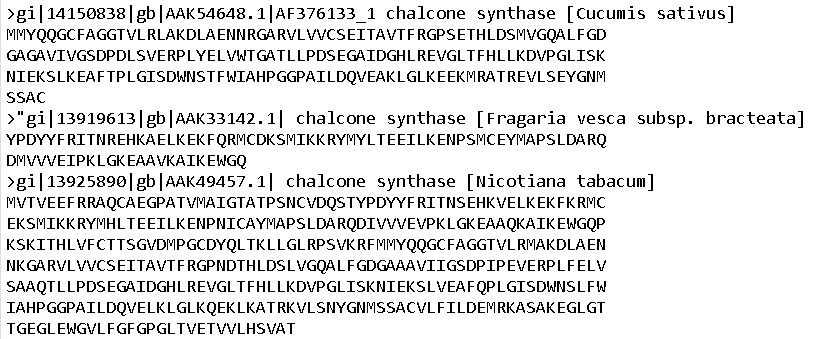

Suponha que queira saber quantos registros o `Bio.SeqIO.write()` escreveu. Se os seus registros estão armazenados em uma lista como nesse exemplo, basta pedir ao Python para mostrar o tamanho dessa lista. Porém, você não pode fazer isso se os registros vierem de um gerador/iterador. Sabendo disso, a função **write** retorna ao final da criação do documento o número de **SeqRecord** escritos no arquivo.

Se você chamar a função **write** com o mesmo arquivo de destino, essa função sobreescreverá em cima desse arquivo a nova informação.

### 5.1.1 Ida e volta

Muitas pessoas acham que os analisadores são de 'ida e volta', isto é: se você ler um arquivo e escrevê-lo de volta, ele permanece inalterado. Isso requer que o analisador extraia informações suficientes para reproduzir o arquivo original com exatidão. A proposta do `Bio.SeqIO` não é fazer isso.

Um exemplo trivial. Qualquer quebra de linha nos dados de sequência de arquivos FASTA é permitido. Um **SeqRecord** idêntico seria fornecido ao analisar os dois exemplos abaixo, que diferem somente nas quebras de linha:

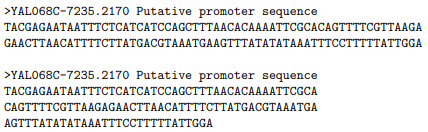

Para fazer uma analisador FASTA 'ida e volta', você poderia acompanhar onde ocorreram as quebras de linhana sequência, mas essa informação geralmente é inútil. Em vez disso, o Biopython usa uma quebra de linha padrão de 60 carateres de saída. O mesmo problema ocorre quando é colocado muitos espaços em branco no arquivo. Outro problema é que em muitos casos o Biopython não faz (ainda) a perservação o último bit de informação (e.g. GenBank e EMBL).

Ocasionalmente, preservar o layout original é importante (com quaisquer peculiaridades que possa ter). Veja a **Seção 5.4.2.2** para saber mais do método **get_raw** do `Bio.SeqIO.index()` para uma potêncial solução.

### 5.5.2 Conversão entre formatos de arquivos de sequência

No exemplo anterior, usamos uma lista para armazenar os objetos **SeqRecords** como entrada de `Bio.SeqIO.write()`, mas somente aceita um iterador **SeqRecord** se vier de um `Bio.SeqIO.parse()`. Vamos converter um arquivo combinando essas duas funções.

Para esse exemplo, usaremos o arquivo GenBank de orquídeas como entrada e a saída será um arquivo FASTA:

In [76]:
from Bio import SeqIO
registros = SeqIO.parse('ls_orchid.gbk', 'gb')
saida = SeqIO.write(registros, 'meu_exemplo.fasta', 'fasta')
print(f'Convertido {saida} registros')

Convertido 94 registros


Ainda assim, é um pouco complicado. Então, como a conversão de arquivos é algo corriqueiro na Bioinformática, o Biopython já possui uma função para essa tarefa:

In [77]:
from Bio import SeqIO
saida = SeqIO.convert('ls_orchid.gbk', 'gb', 'meu_exemplo.fasta', 'fasta')

O `Bio.SeqIO.convert()` precisa dos identificadores *ou* do nome dos arquivos. Mas cuidado, informar o nome do arquivo de saída com um que já existe, ele será sobreescrito. Use a função **help** do Python para saber mais sobre o `Bio.SeqIO.convert()`:

In [78]:
from Bio import SeqIO
help(SeqIO.convert)

Help on function convert in module Bio.SeqIO:

convert(in_file, in_format, out_file, out_format, molecule_type=None)
    Convert between two sequence file formats, return number of records.
    
    Arguments:
     - in_file - an input handle or filename
     - in_format - input file format, lower case string
     - out_file - an output handle or filename
     - out_format - output file format, lower case string
     - molecule_type - optional molecule type to apply, string containing
       "DNA", "RNA" or "protein".
    
    **NOTE** - If you provide an output filename, it will be opened which will
    overwrite any existing file without warning.
    
    The idea here is that while doing this will work::
    
        from Bio import SeqIO
        records = SeqIO.parse(in_handle, in_format)
        count = SeqIO.write(records, out_handle, out_format)
    
    it is shorter to write::
    
        from Bio import SeqIO
        count = SeqIO.convert(in_handle, in_format, out_handle, ou

Em princípio, apenas mudando o nome dos arquivos e o formato, esse código pode ser usado para converter qualquer formato de arquivo disponível no Biopython. Todavia, escrever alguns formatos de arquivos necessitam de informações que os outros não tem (e.g. pontuação de qualidade). Por exemplo, embora você possa transformar um arquivo FASTQ em FASTA, você não pode fazer o caminho de volta (FASTA para FASTQ). Veja as seções **20.1.9** e **20.1.10** no Capítulo 20 (***link do capítulo 20***) para entender melhor a conversão entre os diferentes tipos de FASTQ.

Finalmente, como incentivo adicional para usar o `Bio.SeqIO.convert()`, além do fato do seu código ser bem mais curto, fazer dessa maneira é bem mais rápida! A razão para isso é que essa função de conversão pode tirar proveitos de diversas otimizações e truques específicos de formato de arquivo.

### 5.5.3 Convertendo um arquivo de sequências em seus reversos complementares.

Suponha que você tenha um arquivo com uma sequência de nucleotídeos e deseja obter a sequueência reversa complementar. Para isso, teremos um pouco de trabalho para transformar os objetos **SeqRecord** que obtemos de nosso arquivo de entrada algo adequado para salvar em nosso arquivo de saída.

Para começar, vamos usar a função **parse** para carregar os nucleotídeos do arquivo, mostrar as sequências reversas complementares com o objeto **Seq** e o método **reverse_complement**. Para mais detalhes veja a **Seção 3.6** do Capítulo 3 (https://github.com/GTL98/biopython_br/tree/main/Cap%203%20-%20Objetos%20de%20Sequ%C3%AAncia):

In [79]:
from Bio import SeqIO
for registro in SeqIO.parse('ls_orchid.gbk', 'gb'):
    print(registro.id)
    print(registro.seq.reverse_complement())

Z78533.1
GCGTAAACTCAGCGGGTGCCCCCGCCTGACCTGGGGTCACATCCGAATGGCGGTCAACCGCCCTCCATTGGGGTTCGGAAGGGTTCTCCTGCCTGTCCGACAAGCACGACAACATGGGGGATTCGCACGGCAGCTGCTGCCAGCATCCGTCCACCTCTTGCCGGGTTCCGGGCCATCAAAACACCAGCTCTTGGACCCGCCGCACCTAGGCACAAGGGGCCAATCTTTCACATCCGCACCACGCCGGCCTGGCTGTATGCCGGGCAAGCATTGGCAGGAGAGAGACGAAGCGCGACGCCCAAGCAGGCGTGCCCTTAGCCTGATGGCCTCGGGCGCAACTTGCGTTCAAAAGACTCGATGGTTCACGGGATCTTGCAATTCACACCACTTATCGCATTTCGCTGCGTCCTTCCATCCGATGCAAAGAGCCAAGATTCCCGTTTGCGAGAGTCATCAAAATTCATTGGGCACGCGACAGCACGCCGCCGCTCCGGGTTTTGGGGAAGACAATGCCATTCGCCGGTGATGCTTTCATATGGCTTGGCGCCCAAACTGCGCCGGGCTAGAGGTTCAAACCCGCCATGGACGCTCCCGAGGCGGCCCAACAACAAATCAGGGTCACCACGGGAGCAATGCCCCCGGTGAGCTGAGTACACCGGTCCTCCGGATTCACTCGATCGTTTATTCCACGGTCTCATCAATGATCCTTCCGCAGGTTCACCTACGGAAACCTTGTTACG
Z78532.1
GCCTCAACTCAGCGGGTGGCCCCGCCTGACCTGGGGTCGCATCTGAATGGAAATCAACTGCCCAATGGTTATTTTAGCTCCATTGGGGTTCAATTAGGTTCTTGTGTAGGTTCGAAAAAATACAACAACATGGGGGATTCAAATAGCAGCCTTATGACTGTTAGCATTCTCCACCTCGTGCCACATTCCTACCCATCAAAGCAACAATCCTTAGACCCACCGCACCTAGGCACAAGGGGCC

Agora, se você que salvar essas sequências revesas complementares em um arquivo, você precisa criar os objetos **SeqRecord**. Usaremos a função **reverse_complement** do objeto **SeqRecord**. Para mais informações, veja a **Seção 4.9** do Capítulo 4 (https://github.com/GTL98/biopython_br/tree/main/Cap%204%20-%20Objetos%20de%20anota%C3%A7%C3%A3o%20de%20sequ%C3%AAncia), mas devemos decidir como nomear os nossos novos registros.

Agora é um exelente momento para mostrar o pode da *list comprehensions*:

In [80]:
from Bio import SeqIO
registros = [rec.reverse_complement(id='rc_'+rec.id, description='reverso_complementar')\
             for rec in SeqIO.parse('ls_orchid.fasta', 'fasta')]
len(registros)

94

Agora, a *list comprehensions* tem uma carta na manga que pode ser adicionada:

In [81]:
from Bio import SeqIO
registros = [rec.reverse_complement(id='rc_'+rec.id, description='reverso_complementar')\
            for rec in SeqIO.parse('ls_orchid.fasta', 'fasta') if len(rec)<700]
len(registros)

18

Isso cria na memória uma lista com os registros reversos complementares onde o tamanho das sequências é menor do que 700 pares de base. Contudo, podemos usar a mesma expressão geradora, mas a vantagem é que não precisamos criar uma lista com todos os registros na memória de uma vez. Além disso, vamos guardar essas sequências reversas complementares em um arquivo:

In [82]:
from Bio import SeqIO
registros = (rec.reverse_complement(id='rc_'+rec.id, description='reverso_complementar')\
            for rec in SeqIO.parse('ls_orchid.fasta', 'fasta') if len(rec)<700)
SeqIO.write(registros, 'rev_comp.fasta', 'fasta')

18

Há um exemplo relacionado na **Seção 20.1.3** no Capítulo 20 (***link do capítulo 20***), onde há a tradução de cada registro de nucleotídeo do arquivo FASTA em aminoácido.

### 5.5.4 Obtendo seus objetos SeqRecord como strings formatadas

Suponha que você não queira escrever seus registros em um arquivo ou identificador, ao invés disso quer uma string contendo o registro em um particular formato de arquivo. O `Bio.SeqIO` possui a interface baseada em identificadores, mas o Python tem um módulo interno bem útil que provê uma string baseada em um identificador.

Um exemplo de como você pode usar essa função. Vamos carregar um monte de objetos **SeqRecord** do arquivo GenBank das orquídeas e criar uma string contendo os registros em formato FASTA:

In [83]:
from Bio import SeqIO
from io import StringIO
registros = SeqIO.parse('ls_orchid.gbk', 'gb')
identificador_saida = StringIO()
SeqIO.write(registros, identificador_saida, 'fasta')
dado_fasta = identificador_saida.getvalue()
print(dado_fasta)

>Z78533.1 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAA
CGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGT
GACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCC
CGGCGCAGTTTGGGCGCCAAGCCATATGAAAGCATCACCGGCGAATGGCATTGTCTTCCC
CAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGAATTTTGATGACTCTCGCAAA
CGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGATAAGTGGTGTG
AATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCA
GGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCG
GCATACAGCCAGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCG
GCGGGTCCAAGAGCTGGTGTTTTGATGGCCCGGAACCCGGCAAGAGGTGGACGGATGCTG
GCAGCAGCTGCCGTGCGAATCCCCCATGTTGTCGTGCTTGTCGGACAGGCAGGAGAACCC
TTCCGAACCCCAATGGAGGGCGGTTGACCGCCATTCGGATGTGACCCCAGGTCAGGCGGG
GGCACCCGCTGAGTTTACGC
>Z78532.1 C.californicum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAGAATATA
TGATCGAGTGAATCTGGAGGACCTGTGGTAACTCAGCTCGTCGTGGCACTGCTTTTGTCG
TGAC

Isso não é totalmente simples a primeira vez que você vê! Pelo lado bom, para o caso especial em que você gostaria de uma string contendo um único registro em formato específico de arquivo, basta usar o método **format** do **SeqRecord**. Para mais informações, veja a **Seção 4.6** no Capítulo 4 (https://github.com/GTL98/biopython_br/tree/main/Cap%204%20-%20Objetos%20de%20anota%C3%A7%C3%A3o%20de%20sequ%C3%AAncia).

Observe que usar o método **format** não é encorajado pelo Biopython, mas você pode usar esse método para escrever um arquivo. Segue um exemplo para esclarecer melhor:

In [84]:
from Bio import SeqIO
with open('ls_orchid_long.tab', 'w') as identificador_saida:
    for registro in SeqIO.parse('ls_orchid.gbk', 'gb'):
        if len(registro) > 100:
            identificador_saida.write(registro.format('tab'))

Embora esse estilo de código possa funcionar para um simples arquivo FASTA ou um simples arquivo de separação tabular usado no exemplo acima, pode não funcionar para arquivos mais complexos ou entrelaçados. Por isso o Biopython recomenda usar o `Bio.SeqIO.write()`:

In [85]:
from Bio import SeqIO
registros = (rec for rec in SeqIO.parse('ls_orchid.gbk', 'gb') if len(rec) > 100)
SeqIO.write(registros, 'ls_orchid.tab', 'tab')

94

Chamar um **SeqIO.write** é bem mais rápido e menos comfuso do que chamar vários **SeqRecord.format**.

## 5.6 Analisadores FASTA e FASTQ de baixo nível

Trabalhar com **SimpleFastaParser** ou **FastqGeneralIterator** de baixo nível costuma ser mais prático que `Bio.SeqIO.parse()` quando trabalhamos com grandes arquivos de sequenciamento FASTA ou FASTQ de alto rendimento onde a velocidade é importante. Como mencionado na introdução do deste capítulo, o formato de arquivo neutro do `Bio.SeqIO` tem a sobrecarga de criar vários objetos, mesmo para arquivos mais simples; como o FASTA.

Quando analisamos os arquivos FASTA, o `Bio.SeqIO.parse()` internamente chama o **SimpleFastaParser** de baixo nível com o identificador do arquivo. Você pode usar isso diretamente, iterar sobre o identificador do arquivo, retornando cada registro como uma tupla de duas strings: o título (tudo depois do sinal de maior '>') e a sequência (uma string):

In [86]:
from Bio.SeqIO.FastaIO import SimpleFastaParser
contador = 0
total_len = 0
with open('ls_orchid.fasta') as identificador:
    for titulo, sequencia in SimpleFastaParser(identificador):
        contador += 1
        total_len += len(sequencia)
print(f'{contador} registros com comprimento total de sequência de {total_len}')

94 registros com comprimento total de sequência de 67518


Do mesmo modo, quando você estiver analisando os arquivos FASTQ, internamente `Bio.SeqIO.parse()` chama internamente o **FastqGeneralIterator** de baixo nível com o identificador do arquivo. Se você não precisa que as pontuações de qualidade sejam transformadas em números inteiros, pode trabalhar com elas como strings ASCII; o que é o ideal:

In [88]:
from Bio.SeqIO.QualityIO import FastqGeneralIterator
contador = 0
total_len = 0
with open('example.fastq') as identificador:
    for titulo, sequencia, qual in FastqGeneralIterator(identificador):
        contador += 1
        total_len += len(sequencia)
print(f'{contador} registros com comprimento total de sequência de {total_len}')

3 registros com comprimento total de sequência de 75


Existem mais exemplos no Capítulo 20 (***link do capítulo 20***), incluindo como criar arquivo FASTQ de forma eficiente a partir de strings.

Só isso, mais nada!